**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpra_vote2_v2_split_pool_by_tss"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)

dat_fit_summary = dat
print(dim(dat))
head(dat)

Rows: 2084 Columns: 6
── Column specification ────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Group, Feature
dbl (4): Stat, Pval, Score, Padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Distal:Active,H2AFZ,45.036759,0,2.22870227,0
Distal:Active,H3K27ac,37.755824,0,1.70492830,0
Distal:Active,H3K27me3,-6.310267,0,-1.46508623,0
Distal:Active,H3K36me3,-17.250558,0,-2.25210593,0
Distal:Active,H3K4me1,15.026241,0,0.06981372,0
Distal:Active,H3K4me2,38.867563,0,1.78490428,0


In [3]:
dat = dat_fit_summary
dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::mutate(Rank = rank(-abs(Score))) %>%
    dplyr::ungroup() %>%
    dplyr::filter(Rank <= 30)
   

dat_fit_score_top = dat
print(dim(dat))
head(dat)

[1] 120   7


Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Distal:Active,H2AFZ,45.03676,0,2.228702,0,9
Distal:Active,H3K36me3,-17.25056,0,-2.252106,0,8
Distal:Active,H4K20me1,-30.68734,0,-3.218717,0,1
Distal:Active,ARHGAP35,-13.07312,0,-1.951591,0,20
Distal:Active,ARID2,-12.44205,0,-1.906193,0,25
Distal:Active,ATF3,45.40553,0,2.255231,0,7


In [7]:
dat = dat_fit_summary
dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::mutate(Rank = rank(-abs(Score))) %>%
    dplyr::ungroup() %>%
    dplyr::filter(Feature == "ZBTB7A")
dat

Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Distal:Active,ZBTB7A,7.5420893,0.0000,-0.4685792,0.00000000,357
Distal:Repressive,ZBTB7A,2.2212697,0.0261,-0.1935713,0.04276132,424
Proximal:Active,ZBTB7A,-22.3347948,0.0000,-3.1237794,0.00000000,2
Proximal:Repressive,ZBTB7A,0.6047222,0.5425,1.3212391,0.91649393,96


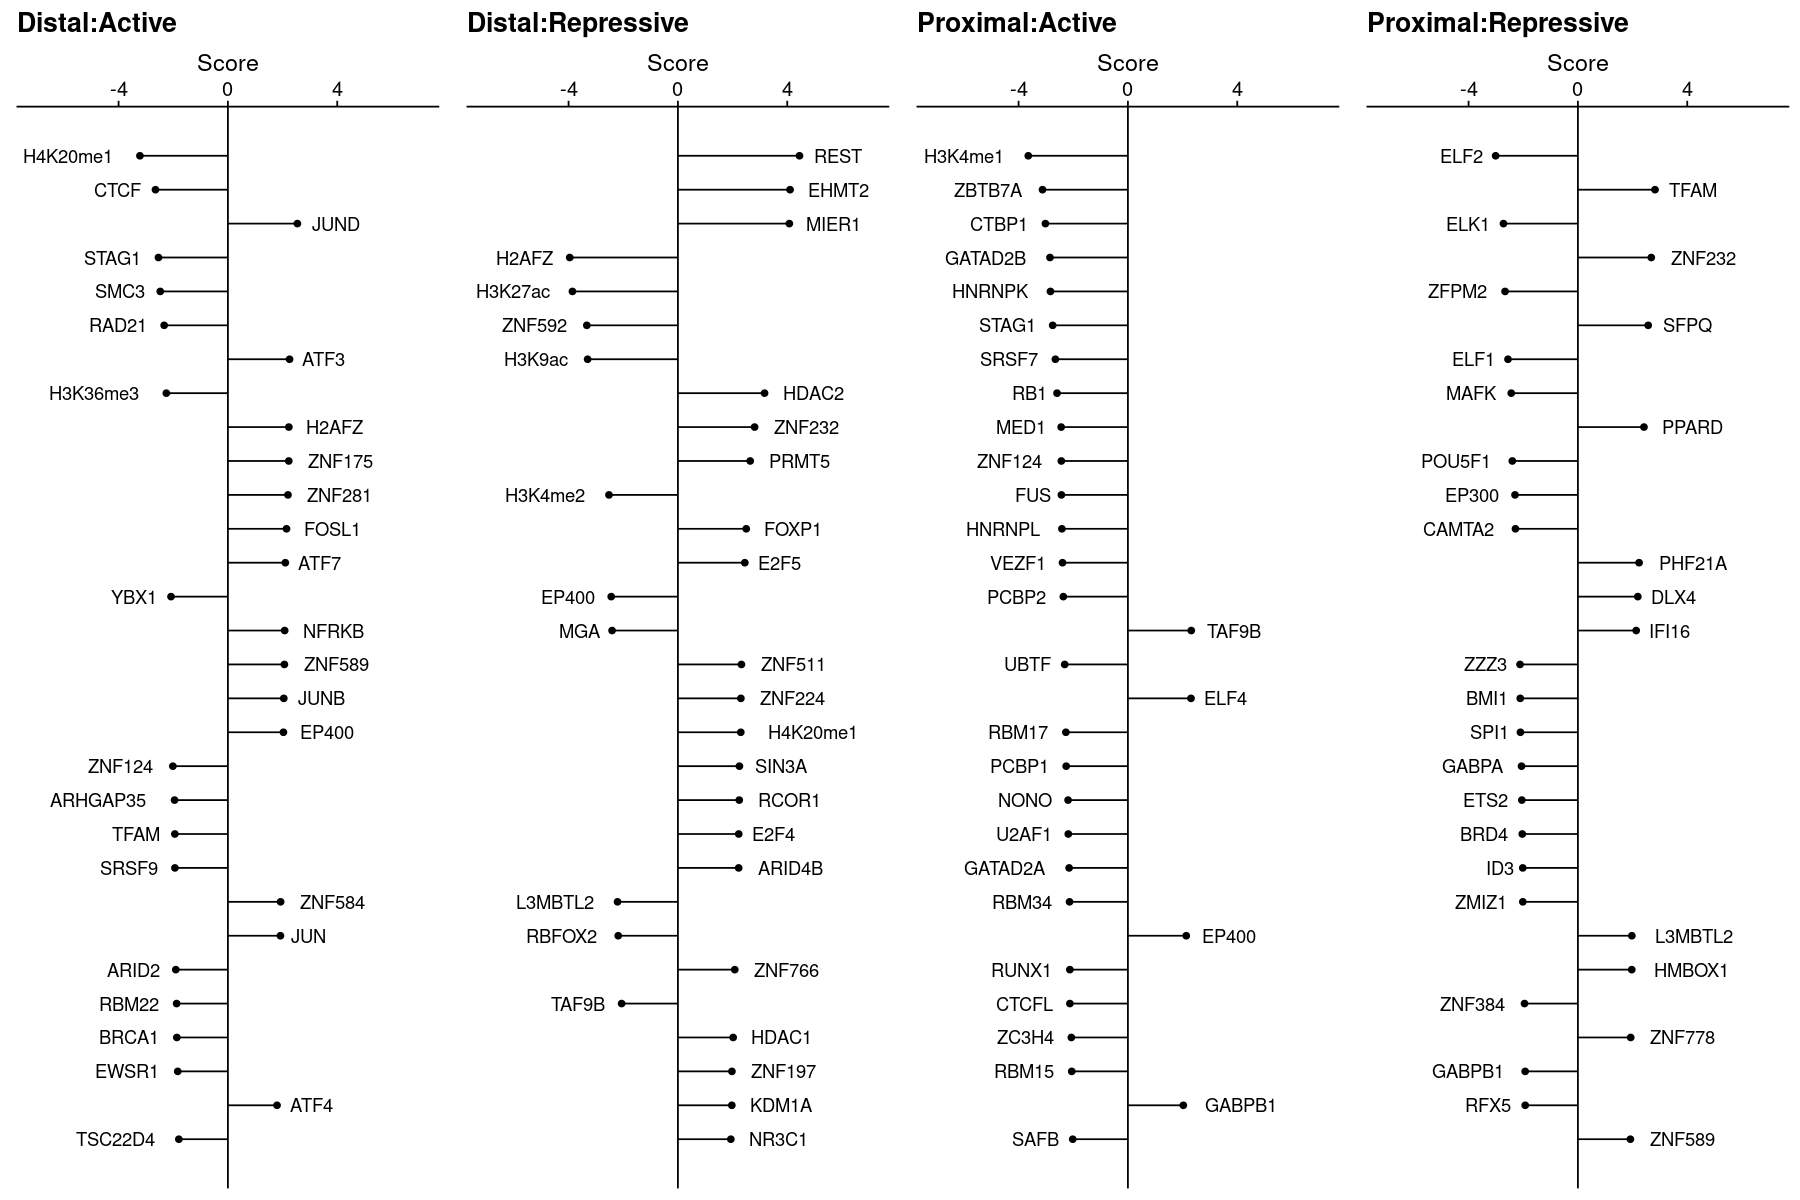

In [5]:
dat = dat_fit_score_top
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Score, y=Rank, label=Feature)) + 
        geom_point() +
        geom_vline(xintercept = 0) +
        geom_linerange(aes(xmin=0, xmax=Score, y=Rank)) +
        geom_text(aes(hjust = ifelse(Score >= 0, -0.3, 1.3)), vjust=0.5) +
        theme_cowplot() +
        scale_y_reverse() + 
        scale_x_continuous(position = 'top', limits = c(-7, 7)) +
        theme(
            axis.title.y = element_blank(),
            axis.text.y  = element_blank(),
            axis.ticks.y = element_blank(),
            axis.line.y  = element_blank())
    return(gpt)
})

lst = lapply(names(lst), function(txt_group){
    gpt = lst[[txt_group]]
    gpt = gpt + labs(title = txt_group)
    return(gpt)
})

options(repr.plot.height=10, repr.plot.width = 15)
plot_grid(plotlist = lst, nrow=1)